In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras
import cv2


from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
images, labels = galaxy10.load_data()

C:\Users\dell\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [11]:
resized_images = []
for image in images:
    resized_image = cv2.resize(image, (64, 64))
    resized_images.append(resized_image)

resized_images = np.array(resized_images)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [14]:
x_train = x_train.astype('float16')
x_val = x_val.astype('float16')
x_test = x_test.astype('float16')

In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

In [16]:
model_6_conv = Sequential()
model_6_conv.add(Conv2D(3, (5, 5), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))  
model_6_conv.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_6_conv.add(MaxPooling2D((2, 2)))
model_6_conv.add(Flatten())
model_6_conv.add(Dense(120, activation='relu'))
model_6_conv.add(Dense(84, activation='relu'))  
model_6_conv.add(Dense(10, activation='softmax'))

In [17]:
model_6_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model_6_conv.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val),verbose=1)

Epoch 1/20


355/355 [==============================] - 17s 34ms/step - loss: 2.0192 - accuracy: 0.2114 - val_loss: 1.8345 - val_accuracy: 0.3027
Epoch 2/20
355/355 [==============================] - 8s 22ms/step - loss: 1.6846 - accuracy: 0.3482 - val_loss: 1.6188 - val_accuracy: 0.3746
Epoch 3/20
355/355 [==============================] - 8s 22ms/step - loss: 1.4539 - accuracy: 0.4478 - val_loss: 1.3837 - val_accuracy: 0.4954
Epoch 4/20
355/355 [==============================] - 8s 22ms/step - loss: 1.3133 - accuracy: 0.5136 - val_loss: 1.3574 - val_accuracy: 0.5004
Epoch 5/20
355/355 [==============================] - 8s 22ms/step - loss: 1.2060 - accuracy: 0.5518 - val_loss: 1.2806 - val_accuracy: 0.5106
Epoch 6/20
355/355 [==============================] - 8s 22ms/step - loss: 1.1485 - accuracy: 0.5808 - val_loss: 1.2445 - val_accuracy: 0.5518
Epoch 7/20
355/355 [==============================] - 8s 22ms/step - loss: 1.0781 - accuracy: 0.6038 - val_loss: 1.2118 - val_accuracy: 0.5

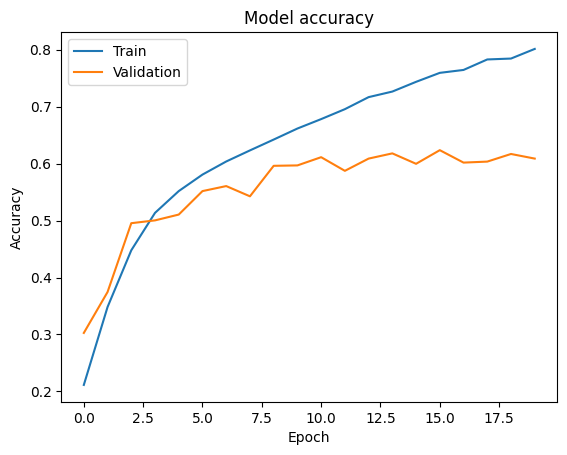

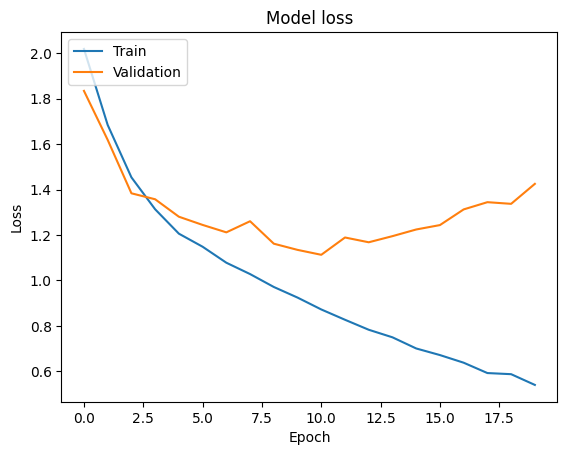

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
test_predictions_6 = model_6_conv.predict(x_test)
test_predictions_6 = np.argmax(test_predictions_6, axis=1) 

111/111 [==============================] - 1s 8ms/step


In [21]:
print(classification_report(y_test, test_predictions_6))

              precision    recall  f1-score   support

           0       0.30      0.26      0.28       204
           1       0.60      0.64      0.62       346
           2       0.75      0.88      0.81       531
           3       0.69      0.69      0.69       389
           4       0.36      0.46      0.40        72
           5       0.61      0.35      0.44       437
           6       0.49      0.56      0.52       380
           7       0.47      0.45      0.46       545
           8       0.74      0.81      0.77       264
           9       0.71      0.76      0.73       380

    accuracy                           0.61      3548
   macro avg       0.57      0.58      0.57      3548
weighted avg       0.60      0.61      0.60      3548

